# Link to Raw Algorithm Code
https://github.com/aymankhan2003/aymankhan2003.github.io/blob/main/posts/logistic/logistic.py

# Fit Method

In [ ]:
def fit(self, X, y, alpha=None, max_epochs=None):
        X_ = self.pad(X)
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.bias = 0
        
        self.loss_history = []
        self.score_history = []
        
        if alpha is not None:
            self.alpha = alpha
        if max_epochs is not None:
            self.max_epochs = max_epochs

        for _ in range(self.max_epochs):
            # Calculate the activation value for each sample
            y_hat = np.dot(X, self.w) + self.bias
            yi = self.sigmoid(y_hat)

            # Calculate the gradients
            a = (1 / n_samples) * np.dot(X.T, (yi - y))
            b = (1 / n_samples) * np.sum(yi - y)

            # Update the weights and bias
            self.w -= self.alpha * a
            self.bias -= self.alpha * b
            
            accuracy = self.score(X, y)
            self.loss_history.append(self.loss(yi, y))
            self.score_history.append(accuracy)

This method specifies how a logistic regression model is fitted. Three parameters are required by the method: X, y, and two optional ones, alpha and max epochs. The X parameter is a 2-dimensional NumPy array of the shape (n samples, n features), where n samples is the dataset's sample count and n features is the total number of features for all samples. The labels for each sample in the dataset are included in a 1-dimensional NumPy array with shape (n samples), which is the y parameter. The learning rate is the alpha parameter. The gradient descent algorithm's maximum number of epochs is indicated by the max_epochs parameter. To accommodate the bias term, the input X is first padded with ones inside the algorithm. The weights and bias are then set to zero at this point. The method then repeats max epochs times with the following results for each iteration:
- The sigmoid function is used to determine the predicted values for the present weights and bias.
- With the use of the mean squared error loss function, it determines the gradients for the weights and bias.
- Using the gradients and learning rate, it updates the weights and bias.
- It keeps track of the accuracy and loss for this iteration.
- The loss and accuracy histories are kept in self.loss history and self.score history, respectively, at the end of the method.


# Fit Stochastic Method

In [ ]:
def fit_stochastic(self, X, y, alpha=None, max_epochs=None, batch_size=None, momentum=False):  
        X_ = self.pad(X)
        if alpha is not None:
            self.alpha = alpha
        if max_epochs is not None:
            self.max_epochs = max_epochs
        if batch_size is None:
            batch_size = X.shape[0]
        
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.bias = 0
    
        self.loss_history = []
        self.score_history = []  # initialize score_history list here
        velocity = np.zeros_like(self.w) if momentum else 0

        for epoch in range(self.max_epochs):
            order = np.arange(n_samples)
            np.random.shuffle(order)
    
            for batch in np.array_split(order, n_samples // batch_size + 1):
                xi = X[batch,:]  
                yi = y[batch]
                y_hat = np.dot(xi, self.w) + self.bias
        
                if momentum:
                    gradient = np.dot(self.sigmoid(y_hat) - yi, xi) / n_samples
                    velocity = 0.8*velocity + alpha * gradient
                    self.w -= velocity
                else:
                    gradient = np.dot(self.sigmoid(y_hat) - yi, xi) / n_samples
                    self.w -= alpha * gradient
            
            y_hat = self.sigmoid(np.dot(X, self.w))
            accuracy = self.score(X, y)
            self.loss_history.append(self.loss(y_hat, y))
            self.score_history.append(accuracy) 

This method describes the stochastic gradient descent fit for a logistic regression model. The method requires five parameters: X, y, alpha, max epochs, and batch size. The fit method's X and y parameters remain the same. The learning rate, or alpha parameter, regulates the gradient descent step size. The maximum number of epochs for the algorithm to run is specified by the max epochs option. The size of each mini-batch in the method is specified by the batch size parameter. To account for the bias term, the approach first pads the input X with ones. Then, it adjusts the values of alpha, max epochs, and batch_size as necessary after verifying that they are supplied. The bias and weights have zero initial values. A new score_history list is initialized along with the loss_history list to store the accuracy history for every epoch. The procedure initializes a new velocity array with the same structure as the weights array if momentum is set to True. The use of momentum is controlled by the momentum parameter. The order of the samples is then randomly shuffled when the procedure repeats over each epoch. The samples are then divided into smaller batches of size batch_size. The method uses the sigmoid function to determine for each mini-batch the predicted values for the current weights and bias. The mean squared error loss function is then used to determine the gradients for the weights and bias. If momentum is set to True, the method first updates the weights using the velocity array before updating the velocity array. Otherwise, it uses the gradients and the learning rate to directly update the weights. The approach determines the predicted values for all samples using the current weights and bias after iterating over all of the mini-batches. Also, it computes this epoch's accuracy and loss and adds them to the relevant histories. The loss and accuracy histories are kept in self.loss_history and self.score_history, respectively, at the end of the method.

In [34]:
from logistic import LogisticRegression
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np

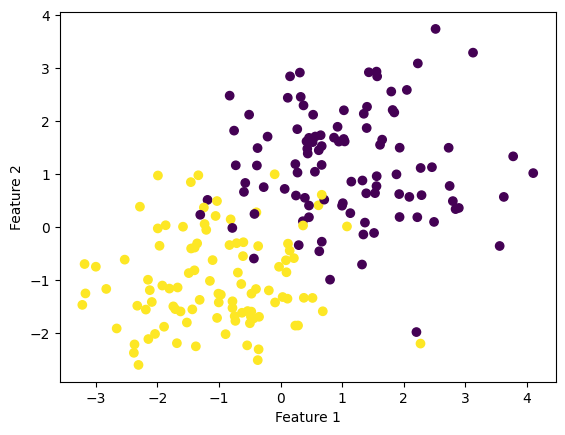

In [25]:
p_features = 10
X, y = make_blobs(n_samples = 200, n_features = p_features, centers = [(1, 1), (-1, -1)])

LR = LogisticRegression()
LR.fit(X, y, alpha = 0.5, max_epochs=1000)

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
plt.show()

#### The data above is synthetic data created using the make blobs portion where 10 dimension features is used which will later be used to analyse in one of the examples.

## Example 1: A case in which gradient descent does not converge to a minimizer because the learning rate is too large.

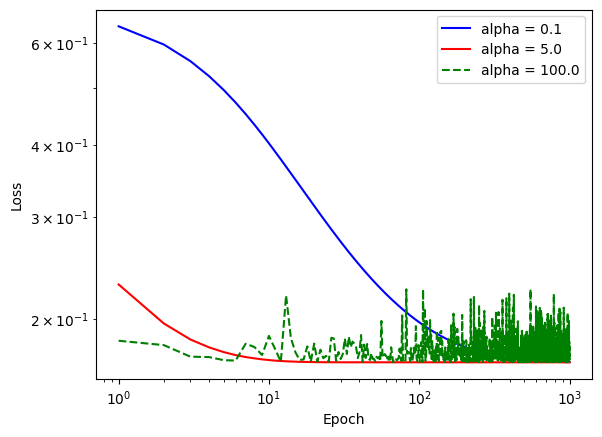

In [26]:
LR.fit_stochastic(X, y, alpha = 0.1, max_epochs = 1000, batch_size = 10)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "alpha = 0.1", color = "blue")

LR_ = LogisticRegression()
LR_.fit_stochastic(X, y, alpha = 5.0, max_epochs = 1000, batch_size = 10)

num_steps = len(LR_.loss_history)
plt.plot(np.arange(num_steps) + 1, LR_.loss_history, label = "alpha = 5.0", color = "red")

LR_X = LogisticRegression()
LR_X.fit_stochastic(X, y, alpha = 100, max_epochs = 1000, batch_size = 10)

num_steps = len(LR_X.loss_history)
plt.plot(np.arange(num_steps) + 1, LR_X.loss_history, label = "alpha = 100.0", linestyle = "--", color = "green")

xlab = plt.xlabel("Epoch")
ylab = plt.ylabel("Loss")

plt.loglog()

legend = plt.legend()

#### This graph shows the line with moderately higher alpha/learning rate of 5 converges better, while an alpha/learning rate of 100 does not converge as it does not fit, while an alpha/learning rate of 0.1, takes time to converge.

## Example 2: A case in which the choice of batch size influences how quickly the algorithm converges.

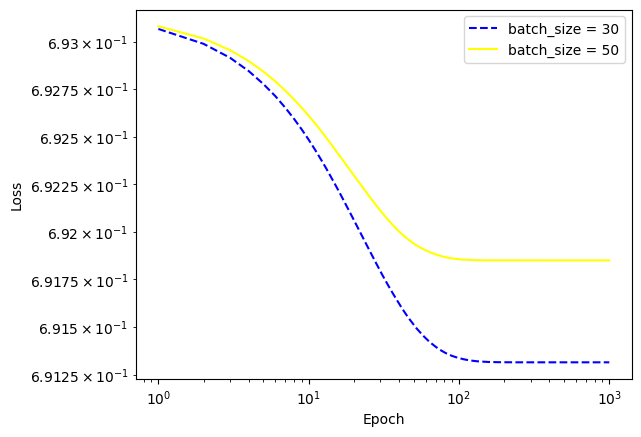

In [24]:
X, y = make_blobs(n_samples = 200, n_features = 5, centers = [(0, 0), (0, 0)])

LR = LogisticRegression()
LR.fit_stochastic(X, y, alpha = 0.1, max_epochs = 1000, batch_size = 30)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "batch_size = 30", linestyle = "--", color = "blue")

LR_ = LogisticRegression()
LR_.fit_stochastic(X, y, alpha = 0.1, max_epochs = 1000, batch_size = 50)

num_steps = len(LR_.loss_history)
plt.plot(np.arange(num_steps) + 1, LR_.loss_history, label = "batch_size = 50", linestyle = "-", color = "yellow")

xlab = plt.xlabel("Epoch")
ylab = plt.ylabel("Loss")

plt.loglog()

legend = plt.legend()

#### This graph shows the lower the batch-size is, the faster it converges, as a batch size of 30 converges faster than a batch size of 50.

## Example 3: If you implemented momentum, a case in which the use of momentum significantly speeds up convergence.

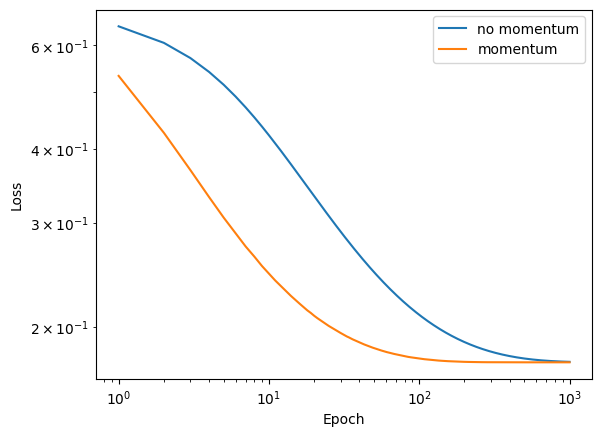

In [27]:
X, y = make_blobs(n_samples = 200, n_features = 5, centers = [(-1, -1), (1, 1)])

LR = LogisticRegression()
LR.fit_stochastic(X, y, alpha = 0.1, max_epochs = 1000, batch_size = 10, momentum=False)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "no momentum")

LR_ = LogisticRegression()
LR_.fit_stochastic(X, y, alpha = 0.1, max_epochs = 1000, batch_size = 10, momentum=True)

num_steps = len(LR_.loss_history)
plt.plot(np.arange(num_steps) + 1, LR_.loss_history, label = "momentum")

xlab = plt.xlabel("Epoch")
ylab = plt.ylabel("Loss")

plt.loglog()

legend = plt.legend()

#### The graph clearly shows the orange line which states momentum converges faster than the blue line which indicates no momentum.

## All Lines Together

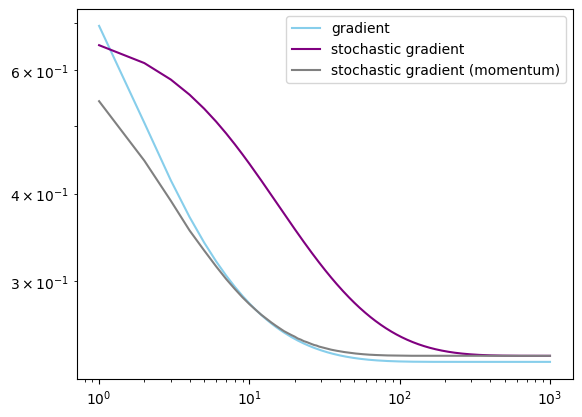

In [33]:
X, y = make_blobs(n_samples = 200, n_features = 5, centers = [(-1, -1), (1, 1)])

#Standard gradient descent
LR = LogisticRegression()
LR.fit(X, y, alpha = 0.5, max_epochs = 1000)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient", color = "skyblue")

#Stochastic gradient descent
LR1 = LogisticRegression()
LR1.fit_stochastic(X, y, 
    max_epochs = 1000, 
    momentum = False, 
    batch_size = 10, 
    alpha = 0.1)

num_steps = len(LR1.loss_history)
plt.plot(np.arange(num_steps) + 1, LR1.loss_history, label = "stochastic gradient", color = "purple")

#Stochastic gradient descent with momentum
LR2 = LogisticRegression()
LR2.fit_stochastic(X, y, 
    max_epochs = 1000, 
    momentum = True, 
    batch_size = 10, 
    alpha = 0.1) 

num_steps = len(LR2.loss_history)
plt.plot(np.arange(num_steps) + 1, LR2.loss_history, label = "stochastic gradient (momentum)", color = "grey")

plt.loglog()

legend = plt.legend() 

#### Overall we can see the stochastic gradient with momentum to converge quicker but in the end the gradient itself catches up.